In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anutex-yearly-sales-preprocessed/retail.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive

In [3]:
# Load data
data_path = "/kaggle/input/anutex-yearly-sales-preprocessed/retail.csv"
df = pd.read_csv(data_path)

In [4]:
df['QTY'][1103]

4

In [5]:
# Preprocessing
def preprocess_data(df):
    # Handle invalid Year entries (e.g., ranges like '2024-2025')
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(float).astype(int)
    df['AMT'] = df['AMT'].str.replace('[₹ ,]', '', regex=True).str.strip()
    #df['AMT'] = df['AMT'].str.replace(r'^- ', '-', regex=True)
    df['AMT'] = pd.to_numeric(df['AMT'], errors='coerce').fillna(0).astype(float)
    return df

df = preprocess_data(df)

In [6]:
df

,Division,Section,BRAND,RSP,Department,VENDOR,SIZE,PUR,WSP,Site,Month,Year,QTY,AMT,TYPE,RSP_RANGE,WSP_RANGE,LOB,ARTICLE,PRODUCT
0,BEDSHEET,BEDSHEET,GURMUKHDAS,399,AH,K. GURMUKHDAS,6*6,ATP029,399,ASR,Jul,2024,37,14060.00,SAL,301-400,301-400,TEXTILES,BEDSHEET-BEDSHEET-AH,BEDSHEET
1,BEDSHEET,BEDSHEET,GURMUKHDAS,399,AH,K. GURMUKHDAS,6*6,ATP029,650,ASR,Jul,2024,5,1900.00,SAL,301-400,601-700,TEXTILES,BEDSHEET-BEDSHEET-AH,BEDSHEET
2,BEDSHEET,BEDSHEET,GURMUKHDAS,799,AH,K. GURMUKHDAS,6*6,ATP029,650,ASR,May,2024,8,4948.64,SAL,701-800,601-700,TEXTILES,BEDSHEET-BEDSHEET-AH,BEDSHEET
3,BEDSHEET,BEDSHEET,GURMUKHDAS,799,AH,K. GURMUKHDAS,6*6,ATP029,650,ASR,Jun,2024,6,3711.48,SAL,701-800,601-700,TEXTILES,BEDSHEET-BEDSHEET-AH,BEDSHEET
4,BEDSHEET,BEDSHEET,GURMUKHDAS,999,AH,K. GURMUKHDAS,9*9,ATP029,999,ASR,Oct,2024,13,12368.54,SAL,901-1000,901-1000,TEXTILES,BEDSHEET-BEDSHEET-AH,BEDSHEET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406081,SEASON WEAR,WINTER WEAR,SHIVAM,375,WOLLEN SCARFS,JM JAIN LLP,-,ATP036,375,RKUPL,Dec,2023,6,2092.59,SAL,301-400,301-400,KIDS,SEASON WEAR-WINTER WEAR-WOLLEN SCARFS,WOLLEN CAPS
406082,SEASON WEAR,WINTER WEAR,DEAREX,125,WOLLEN SOCKS,J M JAIN,FULL,ATP010,125,RKUPL,Apr,2023,1,119.04,SAL,101-200,101-200,KIDS,SEASON WEAR-WINTER WEAR-WOLLEN SOCKS,WOLLEN SOCKS
406083,SEASON WEAR,WINTER WEAR,SHIVAM,125,WOLLEN SOCKS,JM JAIN LLP,-,ATP036,125,RKUPL,Nov,2023,2,238.08,SAL,101-200,101-200,KIDS,SEASON WEAR-WINTER WEAR-WOLLEN SOCKS,WOLLEN SOCKS
406084,SEASON WEAR,WINTER WEAR,SHIVAM,125,WOLLEN SOCKS,JM JAIN LLP,-,ATP036,125,RKUPL,Dec,2023,1,119.04,SAL,101-200,101-200,KIDS,SEASON WEAR-WINTER WEAR-WOLLEN SOCKS,WOLLEN SOCKS


In [7]:
df['Year'].unique()

array([2024, 2023])

In [8]:
def focus_analysis_all_articles(df):
    # Group by ARTICLE and calculate total QTY and AMT
    grouped = df.groupby('ARTICLE')[['QTY', 'AMT']].sum().reset_index()

    # Calculate total QTY and AMT across all articles
    total_qty = df['QTY'].sum()
    total_amt = df['AMT'].sum()

    # Add percentage contribution columns
    grouped['QTY_Focus (%)'] = (grouped['QTY'] / total_qty) * 100
    grouped['AMT_Focus (%)'] = (grouped['AMT'] / total_amt) * 100

    # Sort by AMT contribution
    grouped = grouped.sort_values('AMT_Focus (%)', ascending=False).reset_index(drop=True)

    return grouped

# Perform focus analysis for all articles
focus_results = focus_analysis_all_articles(df)

print(len(focus_results))
# Display the top 10 articles by AMT focus
print(focus_results.head(1099))


1099
                                  ARTICLE    QTY          AMT  QTY_Focus (%)  \
0            LADIES-L PANT SET-L PANT SET  23752  22576249.91       1.951646   
1                           LF-OFFER-KFSU  25953  18460526.20       2.132497   
2                          LF-OFFER-FANCY  25256  17419392.78       2.075226   
3                      LADIES-L KURTHI-AH  31618  16904736.62       2.597977   
4                      LADIES-CHUDIDAR-AH   9408  15788850.35       0.773033   
...                                   ...    ...          ...            ...   
1094             LADIESWEAR-WESTRN-SHRUGS      1        47.14       0.000082   
1095         BOYS-ACCESORIES-BOYS SANDLES      1        46.66       0.000082   
1096     LADIES U. GARMENTS-L HOSIERY-IMP      1        36.58       0.000082   
1097          GENTS1-ACCESSORIES-OPTICALS      3         2.52       0.000247   
1098  GENTS1-ACCESSORIES-BLUETOOTH KILLER      1         0.84       0.000082   

      AMT_Focus (%)  
0      2.868


### Analysis for Year: 2024 ###
Top 5 Articles by AMT Focus:
                        ARTICLE    QTY          AMT  QTY_Focus (%)  \
0  LADIES-L PANT SET-L PANT SET  12005  10879856.16       2.588004   
1                LF-OFFER-FANCY  15631  10719101.94       3.369687   
2                  LF-OFFER-MAU   8848   7279456.22       1.907427   
3            LADIES-CHUDIDAR-AH   4028   6380526.08       0.868345   
4            LADIES-L KURTHI-AH  12366   6029380.82       2.665827   

   AMT_Focus (%)  
0       3.757819  
1       3.702296  
2       2.514268  
3       2.203785  
4       2.082502  


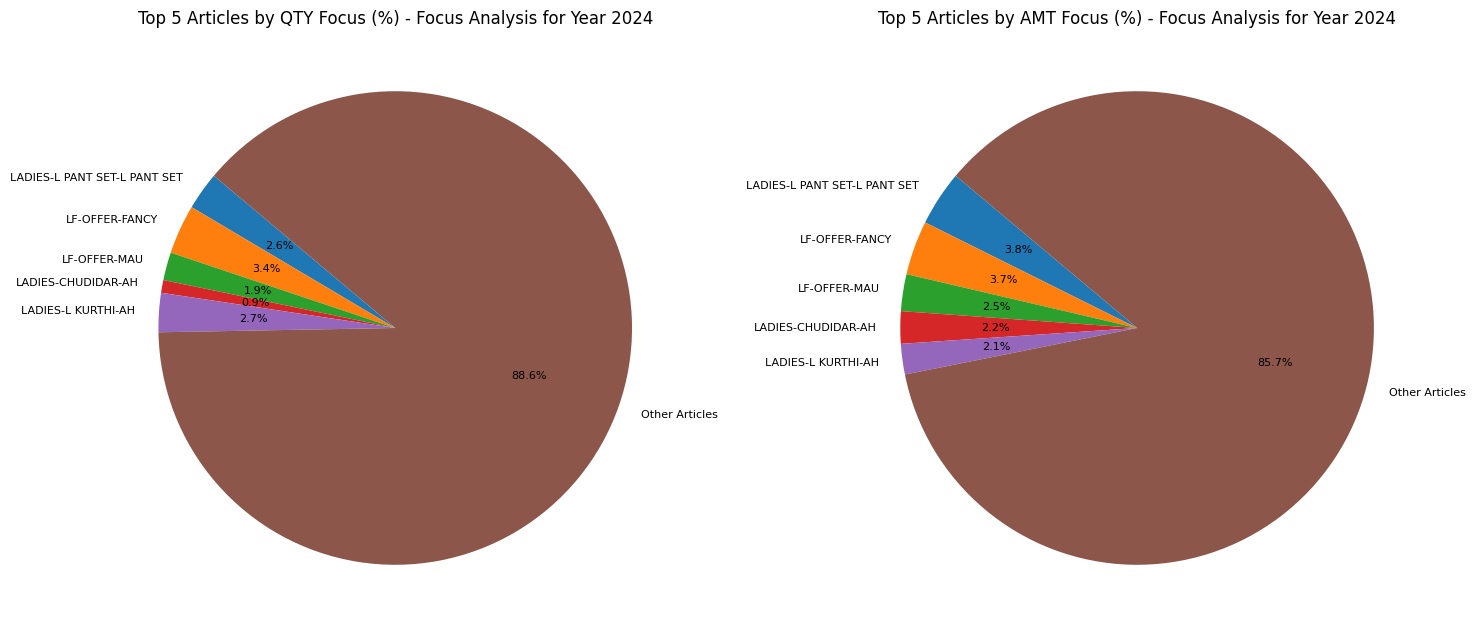


        **Insights for Year 2024:**
        1. The top-performing article by sales (AMT) is **LADIES-L PANT SET-L PANT SET**, contributing 
           3.76% of the total sales (AMT).
        2. The same article contributed 2.59% in terms of quantity (QTY).
        3. The top 5 articles collectively account for:
           - 14.26% of total sales (AMT).
           - 11.40% of total quantity (QTY).
        4. Other articles collectively contributed:
           - 85.74% of sales (AMT).
           - 88.60% of quantity (QTY).
        

### Analysis for Year: 2023 ###
Top 5 Articles by AMT Focus:
                        ARTICLE    QTY          AMT  QTY_Focus (%)  \
0                 LF-OFFER-KFSU  22288  15549303.38       2.959292   
1  LADIES-L PANT SET-L PANT SET  11747  11696393.75       1.559710   
2            LADIES-L KURTHI-AH  19252  10875355.80       2.556187   
3            LADIES-CHUDIDAR-AH   5380   9408324.27       0.714330   
4                 LF-OFFER-BGLR  12069   9338400.50

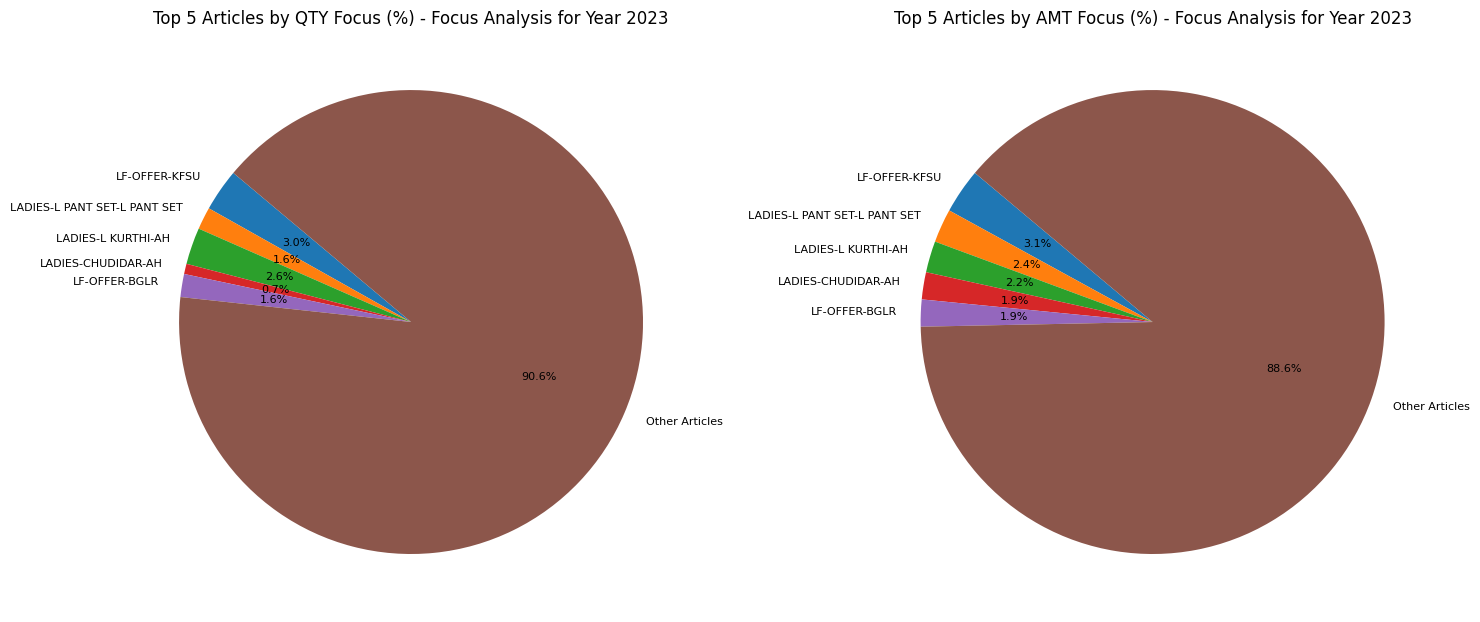


        **Insights for Year 2023:**
        1. The top-performing article by sales (AMT) is **LF-OFFER-KFSU**, contributing 
           3.13% of the total sales (AMT).
        2. The same article contributed 2.96% in terms of quantity (QTY).
        3. The top 5 articles collectively account for:
           - 11.43% of total sales (AMT).
           - 9.39% of total quantity (QTY).
        4. Other articles collectively contributed:
           - 88.57% of sales (AMT).
           - 90.61% of quantity (QTY).
        

Comparative Analysis:

        For the year 2024:
        - Top Article by AMT Focus: LADIES-L PANT SET-L PANT SET
          Contribution: 3.76% of sales.
        - Corresponding QTY Contribution: 2.59%.

        

        For the year 2023:
        - Top Article by AMT Focus: LF-OFFER-KFSU
          Contribution: 3.13% of sales.
        - Corresponding QTY Contribution: 2.96%.

        


In [11]:
def focus_analysis_by_year_with_insights(df):
    years = df['Year'].unique()
    yearwise_results = {}

    for year in years:
        print(f"\n### Analysis for Year: {year} ###")
        # Filter data for the year
        df_year = df[df['Year'] == year]
        
        # Perform focus analysis for the year
        focus_results_year = focus_analysis_all_articles(df_year)
        yearwise_results[year] = focus_results_year
        
        # Display the top 5 articles by AMT focus for the year
        print("Top 5 Articles by AMT Focus:")
        print(focus_results_year.head(5))
        
        # Plot focus analysis for the year
        plot_focus_pie(focus_results_year, top_n=5, title=f"Focus Analysis for Year {year}")
        
        # Generate Insights
        top_article = focus_results_year.iloc[0]
        top_5_amt_focus = focus_results_year.head(5)['AMT_Focus (%)'].sum()
        top_5_qty_focus = focus_results_year.head(5)['QTY_Focus (%)'].sum()
        
        print(f"""
        **Insights for Year {year}:**
        1. The top-performing article by sales (AMT) is **{top_article['ARTICLE']}**, contributing 
           {top_article['AMT_Focus (%)']:.2f}% of the total sales (AMT).
        2. The same article contributed {top_article['QTY_Focus (%)']:.2f}% in terms of quantity (QTY).
        3. The top 5 articles collectively account for:
           - {top_5_amt_focus:.2f}% of total sales (AMT).
           - {top_5_qty_focus:.2f}% of total quantity (QTY).
        4. Other articles collectively contributed:
           - {100 - top_5_amt_focus:.2f}% of sales (AMT).
           - {100 - top_5_qty_focus:.2f}% of quantity (QTY).
        """)

    return yearwise_results

def plot_focus_pie(focus_results, top_n=20, title="Focus Analysis"):
    # Select top N articles
    top_articles = focus_results.head(top_n)
    
    # Other Articles Contribution
    total_qty_focus = focus_results['QTY_Focus (%)'].sum()
    total_amt_focus = focus_results['AMT_Focus (%)'].sum()
    other_qty_focus = 100 - top_articles['QTY_Focus (%)'].sum()
    other_amt_focus = 100 - top_articles['AMT_Focus (%)'].sum()

    # Pie Data for QTY
    qty_labels = list(top_articles['ARTICLE']) + ['Other Articles']
    qty_sizes = list(top_articles['QTY_Focus (%)']) + [other_qty_focus]

    # Pie Data for AMT
    amt_labels = list(top_articles['ARTICLE']) + ['Other Articles']
    amt_sizes = list(top_articles['AMT_Focus (%)']) + [other_amt_focus]

    # Plot Pie Charts
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    axs[0].pie(qty_sizes, labels=qty_labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
    axs[0].set_title(f"Top {top_n} Articles by QTY Focus (%) - {title}")

    axs[1].pie(amt_sizes, labels=amt_labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
    axs[1].set_title(f"Top {top_n} Articles by AMT Focus (%) - {title}")

    plt.tight_layout()
    plt.show()

# Perform year-wise focus analysis with insights
yearwise_focus_results_with_insights = focus_analysis_by_year_with_insights(df)

# Comparative Analysis
def comparative_analysis(yearwise_results):
    print("\nComparative Analysis:")
    for year, focus_data in yearwise_results.items():
        top_article = focus_data.iloc[0]
        print(f"""
        For the year {year}:
        - Top Article by AMT Focus: {top_article['ARTICLE']}
          Contribution: {top_article['AMT_Focus (%)']:.2f}% of sales.
        - Corresponding QTY Contribution: {top_article['QTY_Focus (%)']:.2f}%.

        """)

# Generate Comparative Insights
comparative_analysis(yearwise_focus_results_with_insights)



### Comparative Study: 2023 vs 2024 ###

Growth Analysis (2023 -> 2024):
QTY Growth: -38.41%
AMT Growth: -41.79%

Key Insights (2023 -> 2024):

Top 3 contributors for RSP_RANGE:
                  QTY        AMT
RSP_RANGE                      
6001-7000  -8.226691  -9.925361
3001-3500 -19.855160 -24.532503
301-400   -27.955786 -28.399423

Top 3 contributors for WSP_RANGE:
                  QTY        AMT
WSP_RANGE                      
301-400   -30.645574 -30.209541
201-300   -33.361455 -32.524024
6001-7000 -47.347347 -34.108510

Top 3 contributors for VENDOR:
                                      QTY           AMT
VENDOR                                                
AMBIKA RAAS                          inf           inf
VINI FABRICS MARKETING PVT. LTD   6500.0  8.385328e+04
ROSE WOOD                        11775.0  8.384419e+04

Top 3 contributors for Site:
              QTY        AMT
Site                       
ASR   -37.365630 -39.457212
MKJ   -38.721299 -40.614138
RKUPL -38.259

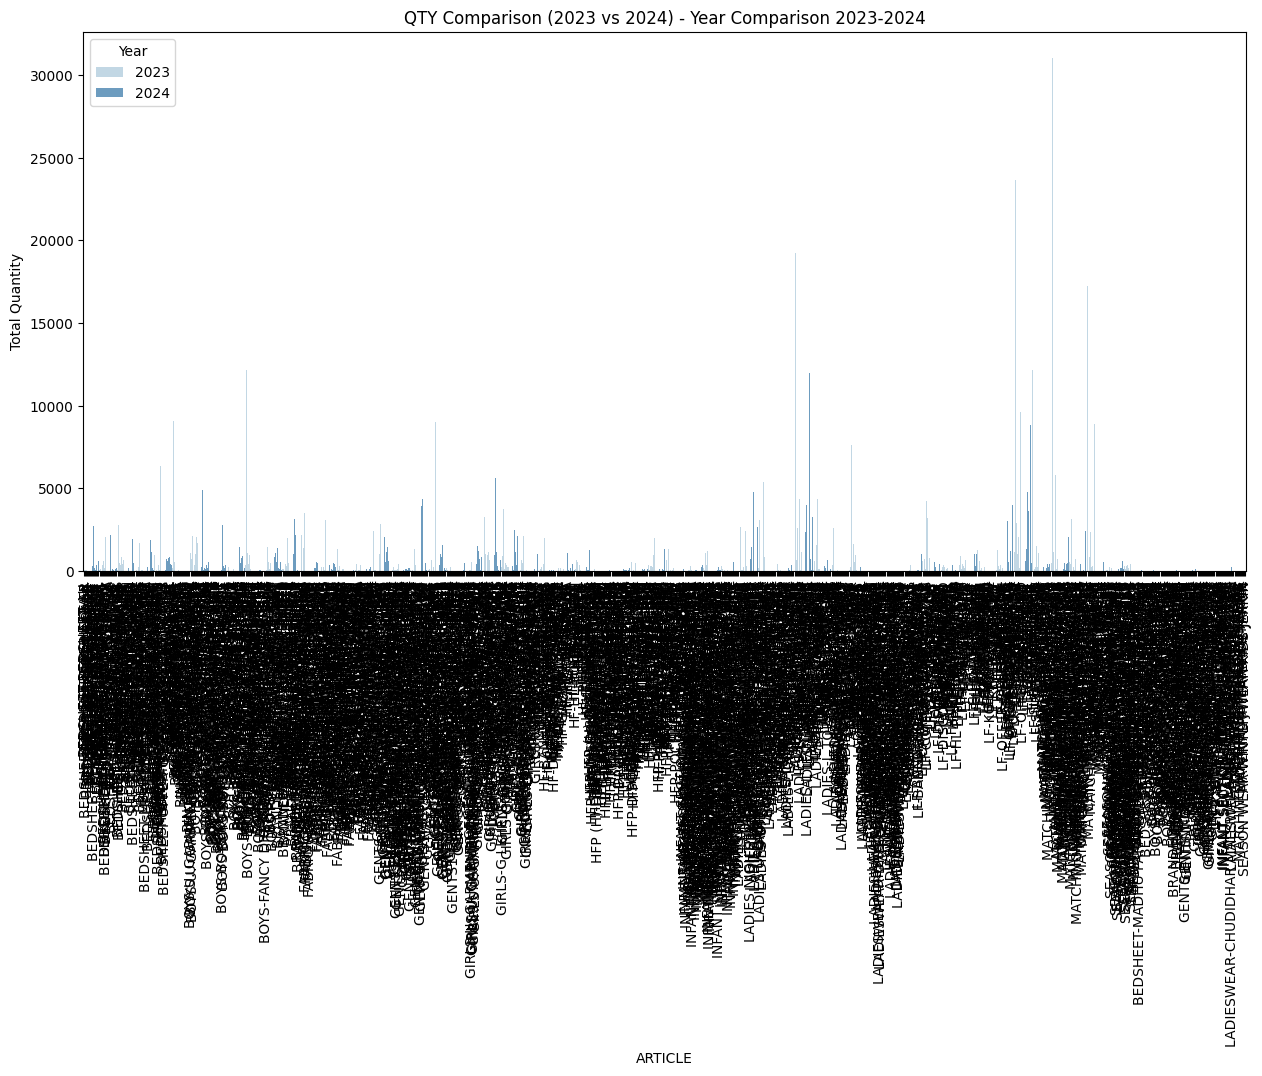

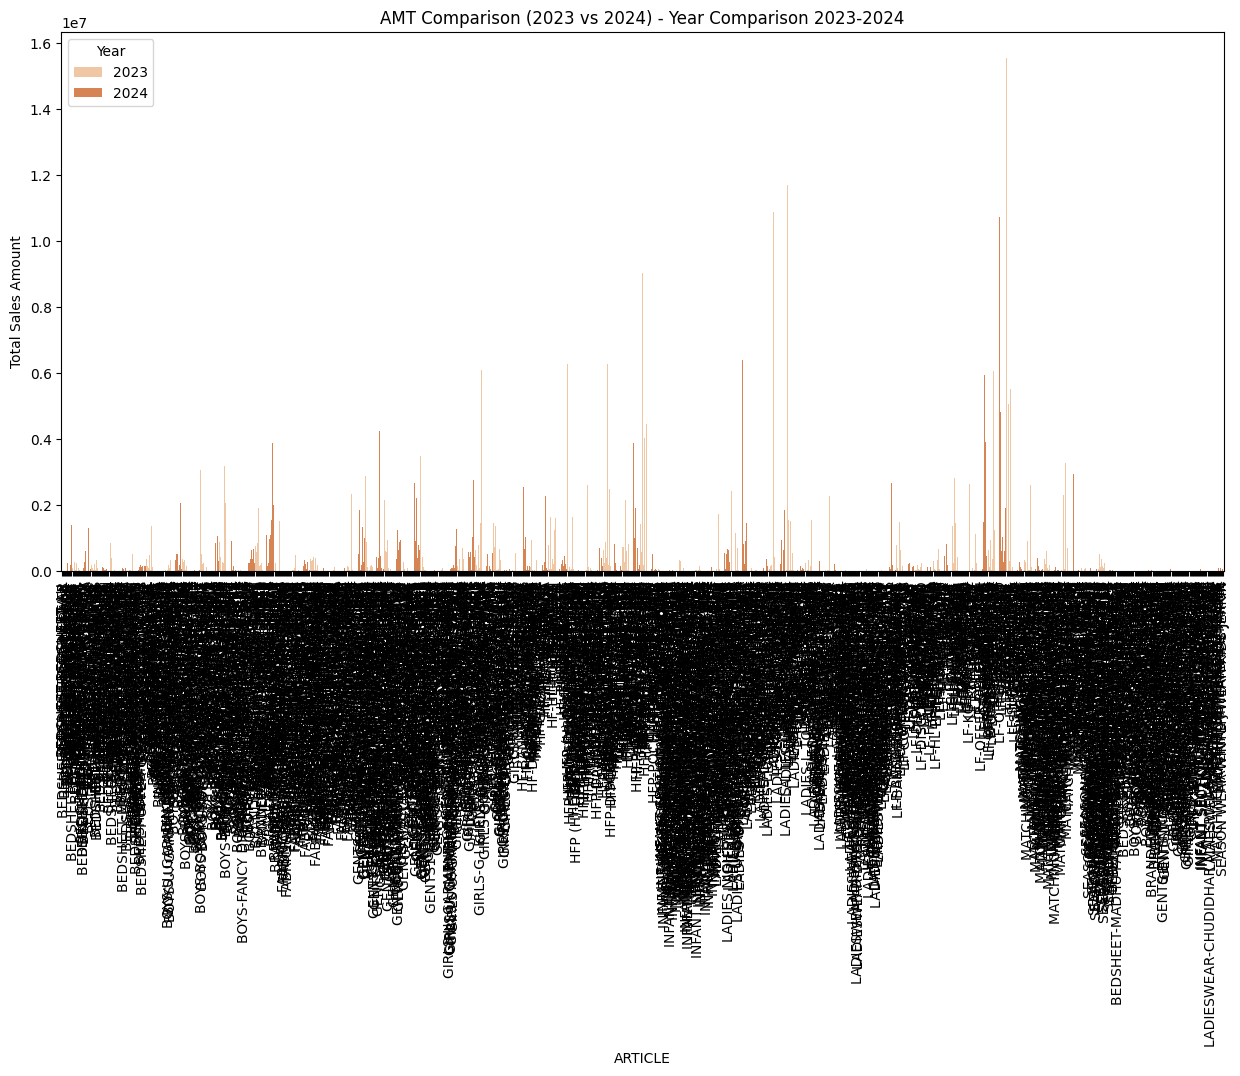

In [23]:
def growth_analysis_all_articles(article_data, year_1, year_2):
    """
    Perform growth analysis for all articles across two years.
    """
    # Filter data for the years
    year_1_data = article_data[article_data['Year'] == year_1]
    year_2_data = article_data[article_data['Year'] == year_2]
    
    # Calculate overall growth
    qty_growth = (year_2_data['QTY'].sum() - year_1_data['QTY'].sum()) / year_1_data['QTY'].sum() * 100
    amt_growth = (year_2_data['AMT'].sum() - year_1_data['AMT'].sum()) / year_1_data['AMT'].sum() * 100
    
    return qty_growth, amt_growth

def plot_growth_comparisons(article_data, year_1, year_2, title="Growth Analysis Across Articles"):
    """
    Plot growth comparisons for all articles between two years.
    """
    yearly_data = article_data.groupby(['Year', 'ARTICLE'])[['QTY', 'AMT']].sum().reset_index()
    
    # Plot side-by-side growth for QTY and AMT
    plt.figure(figsize=(15, 7))
    sns.barplot(x='ARTICLE', y='QTY', hue='Year', data=yearly_data, palette='Blues', alpha=0.8)
    plt.title(f"QTY Comparison ({year_1} vs {year_2}) - {title}")
    plt.xticks(rotation=90)
    plt.ylabel('Total Quantity')
    plt.show()
    
    plt.figure(figsize=(15, 7))
    sns.barplot(x='ARTICLE', y='AMT', hue='Year', data=yearly_data, palette='Oranges', alpha=0.8)
    plt.title(f"AMT Comparison ({year_1} vs {year_2}) - {title}")
    plt.xticks(rotation=90)
    plt.ylabel('Total Sales Amount')
    plt.show()

def why_analysis(article_data, year_1, year_2):
    """
    Identify top factors influencing growth or decline.
    """
    factors = ['RSP_RANGE', 'WSP_RANGE', 'VENDOR', 'Site', 'LOB']
    insights = {}
    
    for factor in factors:
        # Aggregate data by factor for the two years
        factor_data_year_1 = article_data[article_data['Year'] == year_1].groupby(factor)[['QTY', 'AMT']].sum()
        factor_data_year_2 = article_data[article_data['Year'] == year_2].groupby(factor)[['QTY', 'AMT']].sum()
        
        # Calculate growth rates for each factor
        factor_growth = (factor_data_year_2 - factor_data_year_1) / factor_data_year_1 * 100
        factor_growth = factor_growth.sort_values('AMT', ascending=False)
        
        # Store the top 3 growth contributors for each factor
        insights[factor] = factor_growth.head(3)
    
    return insights

def recommend_actions_comparative(qty_growth, amt_growth, insights):
    """
    Generate recommendations based on growth analysis and insights.
    """
    actions = []
    if qty_growth < 0 or amt_growth < 0:
        actions.append("Focus on increasing promotions in high-performing regions (e.g., SITE, LOB).")
        actions.append("Analyze low-performing VENDORs and adjust strategies accordingly.")
    if any(insights['RSP_RANGE']['QTY'] < insights['RSP_RANGE']['AMT']):
        actions.append("Re-evaluate RSP and WSP ranges for underperforming articles.")
    actions.append("Expand focus on the top-performing LOBs for sustainable growth.")
    actions.append("Investigate external factors such as market trends or seasonality affecting sales.")
    return actions

def comparative_growth_study(article_data, years):
    """
    Perform growth analysis, generate insights, and create comparative study.
    """
    comparative_results = {}
    
    for i in range(len(years) - 1):
        year_1, year_2 = years[i], years[i + 1]
        print(f"\n### Comparative Study: {year_1} vs {year_2} ###")
        
        # Growth Analysis
        qty_growth, amt_growth = growth_analysis_all_articles(article_data, year_1, year_2)
        print(f"\nGrowth Analysis ({year_1} -> {year_2}):")
        print(f"QTY Growth: {qty_growth:.2f}%")
        print(f"AMT Growth: {amt_growth:.2f}%")
        
        # Insights
        insights = why_analysis(article_data, year_1, year_2)
        print(f"\nKey Insights ({year_1} -> {year_2}):")
        for factor, data in insights.items():
            print(f"\nTop 3 contributors for {factor}:\n", data)
        
        # Recommendations
        actions = recommend_actions_comparative(qty_growth, amt_growth, insights)
        print(f"\nRecommended Actions:")
        for action in actions:
            print("-", action)
        
        # Visualization
        plot_growth_comparisons(article_data, year_1, year_2, title=f"Year Comparison {year_1}-{year_2}")
        
        # Store results
        comparative_results[(year_1, year_2)] = {
            'qty_growth': qty_growth,
            'amt_growth': amt_growth,
            'insights': insights,
            'actions': actions
        }
    
    return comparative_results

# Perform comparative growth study for all years in the dataset
years = sorted(df['Year'].unique())
comparative_results = comparative_growth_study(df, years)


In [24]:
def plot_growth_comparisons_with_slider(article_data, year_1, year_2, top_n=20, title="Growth Analysis Across Articles"):
    """
    Plot growth comparisons for all articles between two years with a slider for the number of articles displayed.
    """
    # Group by article and year to sum QTY and AMT
    yearly_data = article_data.groupby(['Year', 'ARTICLE'])[['QTY', 'AMT']].sum().reset_index()
    
    # Create the interactive plot function
    def plot_top_articles(top_n):
        # Select the top N articles based on AMT
        top_articles = yearly_data[yearly_data['Year'] == year_1].nlargest(top_n, 'AMT')
        
        # Plot side-by-side growth for QTY and AMT
        plt.figure(figsize=(15, 7))
        sns.barplot(x='ARTICLE', y='QTY', data=top_articles, palette='Blues', alpha=0.8)
        plt.title(f"QTY Comparison ({year_1} vs {year_2}) - {title} - Top {top_n} Articles")
        plt.xticks(rotation=90)
        plt.ylabel('Total Quantity')
        plt.show()
        
        plt.figure(figsize=(15, 7))
        sns.barplot(x='ARTICLE', y='AMT', data=top_articles, palette='Oranges', alpha=0.8)
        plt.title(f"AMT Comparison ({year_1} vs {year_2}) - {title} - Top {top_n} Articles")
        plt.xticks(rotation=90)
        plt.ylabel('Total Sales Amount')
        plt.show()

    # Create a slider to adjust the number of top articles
    slider = widgets.IntSlider(value=top_n, min=5, max=50, step=5, description='Top N Articles:')
    interactive_plot = interactive(plot_top_articles, top_n=slider)
    display(interactive_plot)

In [25]:
def comparative_growth_study_with_slider(article_data, years):
    """
    Perform growth analysis, generate insights, and create comparative study with a slider for article count.
    """
    comparative_results = {}
    
    for i in range(len(years) - 1):
        year_1, year_2 = years[i], years[i + 1]
        print(f"\n### Comparative Study: {year_1} vs {year_2} ###")
        
        # Growth Analysis
        qty_growth, amt_growth = growth_analysis_all_articles(article_data, year_1, year_2)
        print(f"\nGrowth Analysis ({year_1} -> {year_2}):")
        print(f"QTY Growth: {qty_growth:.2f}%")
        print(f"AMT Growth: {amt_growth:.2f}%")
        
        # Insights
        insights = why_analysis(article_data, year_1, year_2)
        print(f"\nKey Insights ({year_1} -> {year_2}):")
        for factor, data in insights.items():
            print(f"\nTop 3 contributors for {factor}:\n", data)
        
        # Recommendations
        actions = recommend_actions_comparative(qty_growth, amt_growth, insights)
        print(f"\nRecommended Actions:")
        for action in actions:
            print("-", action)
        
        # Visualization with slider
        plot_growth_comparisons_with_slider(article_data, year_1, year_2, title=f"Year Comparison {year_1}-{year_2}")
        
        # Store results
        comparative_results[(year_1, year_2)] = {
            'qty_growth': qty_growth,
            'amt_growth': amt_growth,
            'insights': insights,
            'actions': actions
        }
    
    return comparative_results

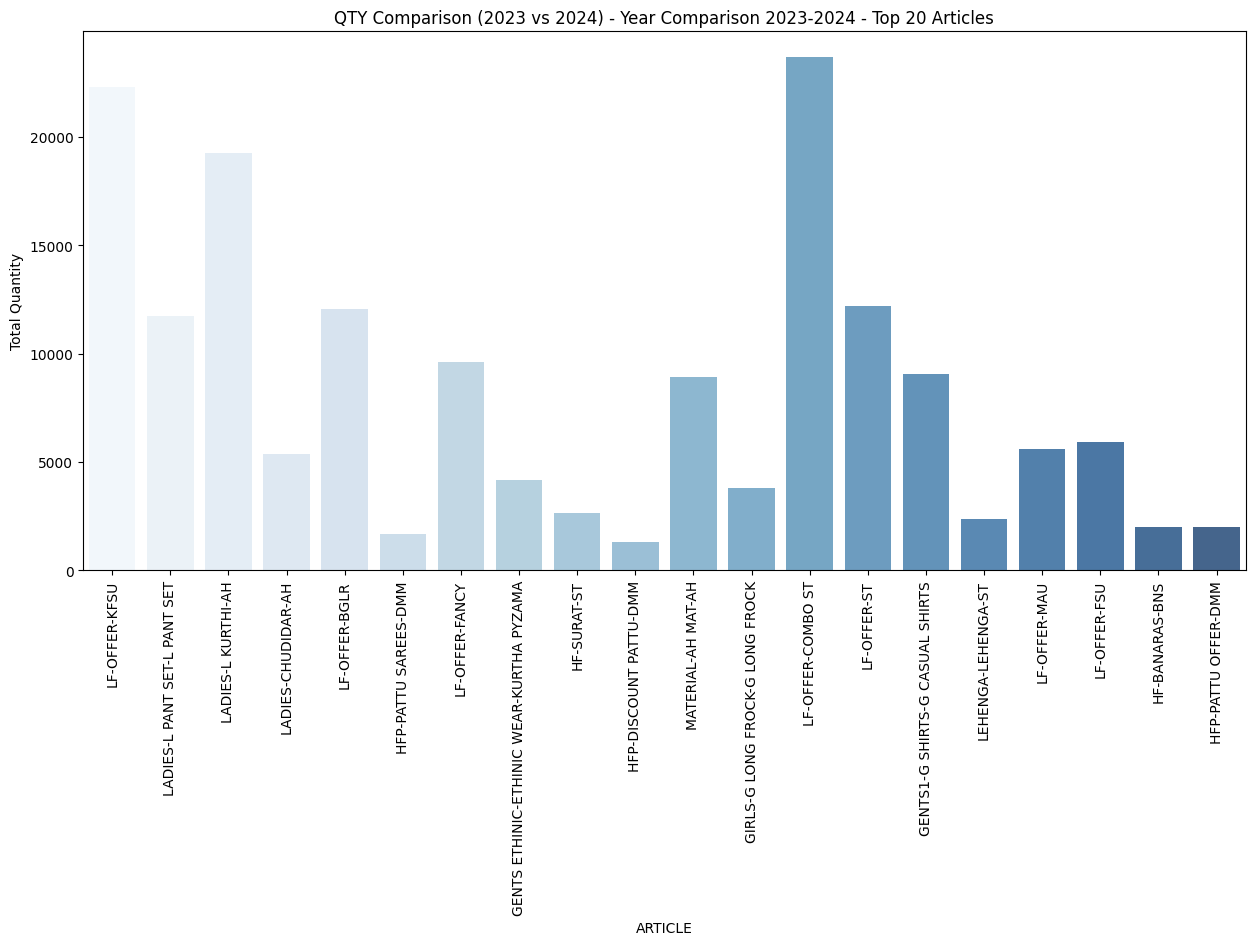

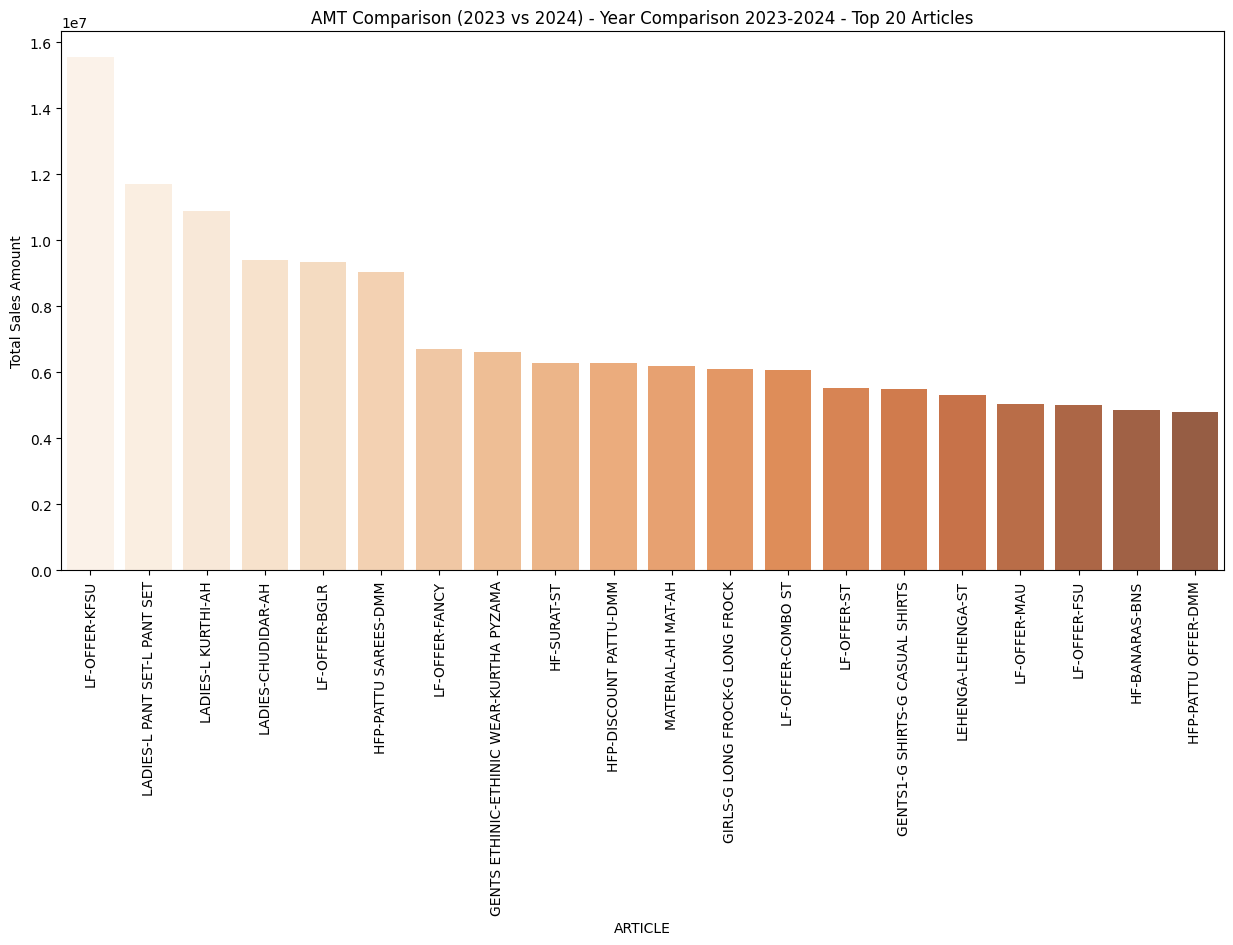

In [26]:
years = sorted(df['Year'].unique())  # Assuming 'df' is your dataset
comparative_results = comparative_growth_study_with_slider(df, years)

In [27]:
import requests
import json
import pandas as pd
from transformers import pipeline


In [28]:
# Function to prepare structured input for LLaMA based on comparative results and insights
def prepare_input_for_llama(comparative_results):
    report_input = ""
    for (year_1, year_2), result in comparative_results.items():
        qty_growth = result['qty_growth']
        amt_growth = result['amt_growth']
        insights = result['insights']
        actions = result['actions']
        
        report_input += f"\n### Comparative Study: {year_1} vs {year_2} ###\n"
        report_input += f"\nGrowth Analysis:\n"
        report_input += f"QTY Growth: {qty_growth:.2f}%\n"
        report_input += f"AMT Growth: {amt_growth:.2f}%\n"
        
        report_input += f"\nKey Insights:\n"
        for factor, data in insights.items():
            report_input += f"\nTop 3 contributors for {factor}:\n{data}\n"
        
        report_input += f"\nRecommended Actions:\n"
        for action in actions:
            report_input += f"- {action}\n"
    
    return report_input

In [29]:
# Function to generate the report using LLaMA model on Hugging Face
def generate_report_with_llama(input_text):
    
    # Prepare the model and tokenizer from Hugging Face
    generator =pipeline("text-generation", model="nvidia/Llama-3.1-Nemotron-70B-Instruct-HF")
    
    # Generate the report based on the prepared input
    report = generator(input_text, max_length=1000, num_return_sequences=1)
    
    return report[0]['generated_text']

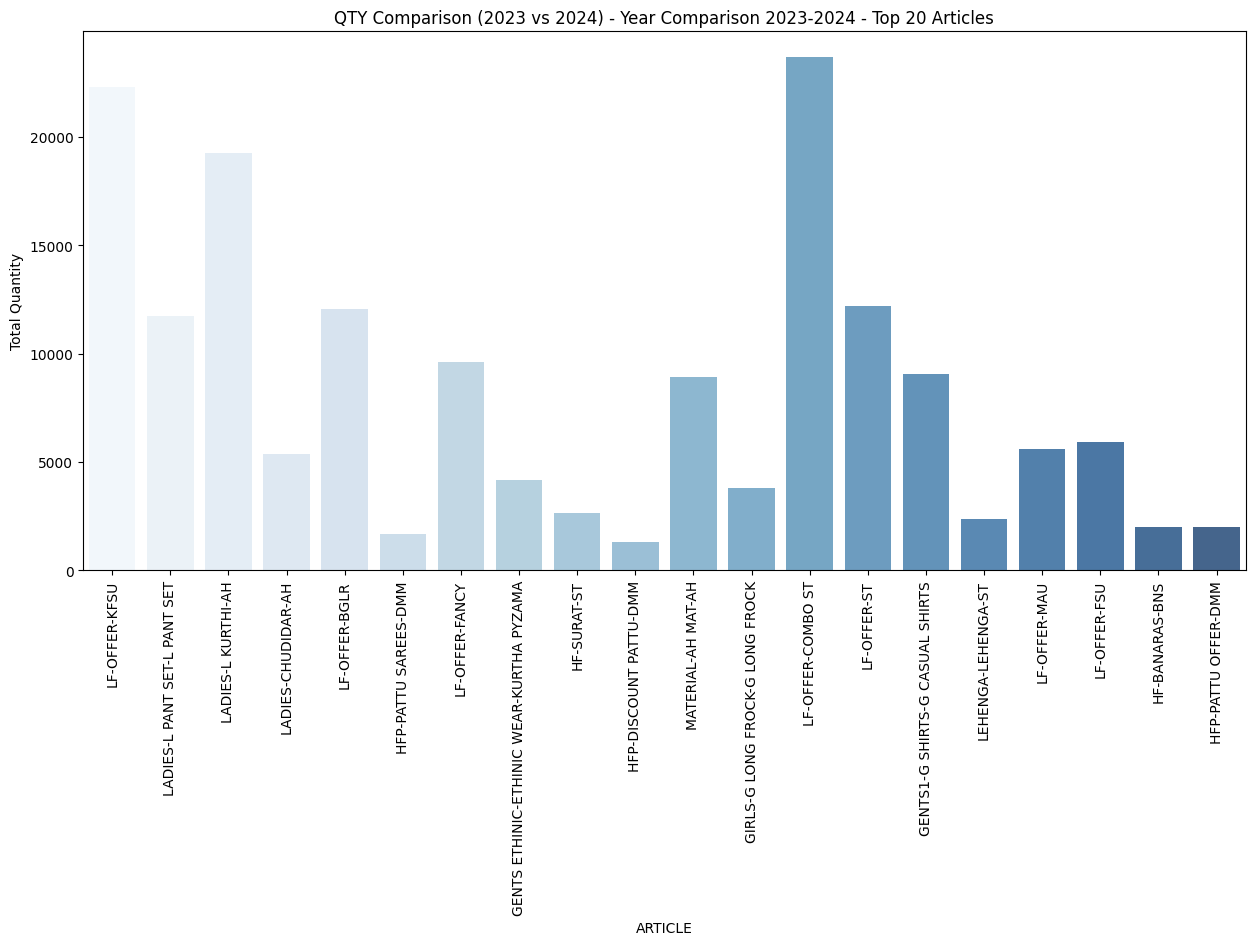

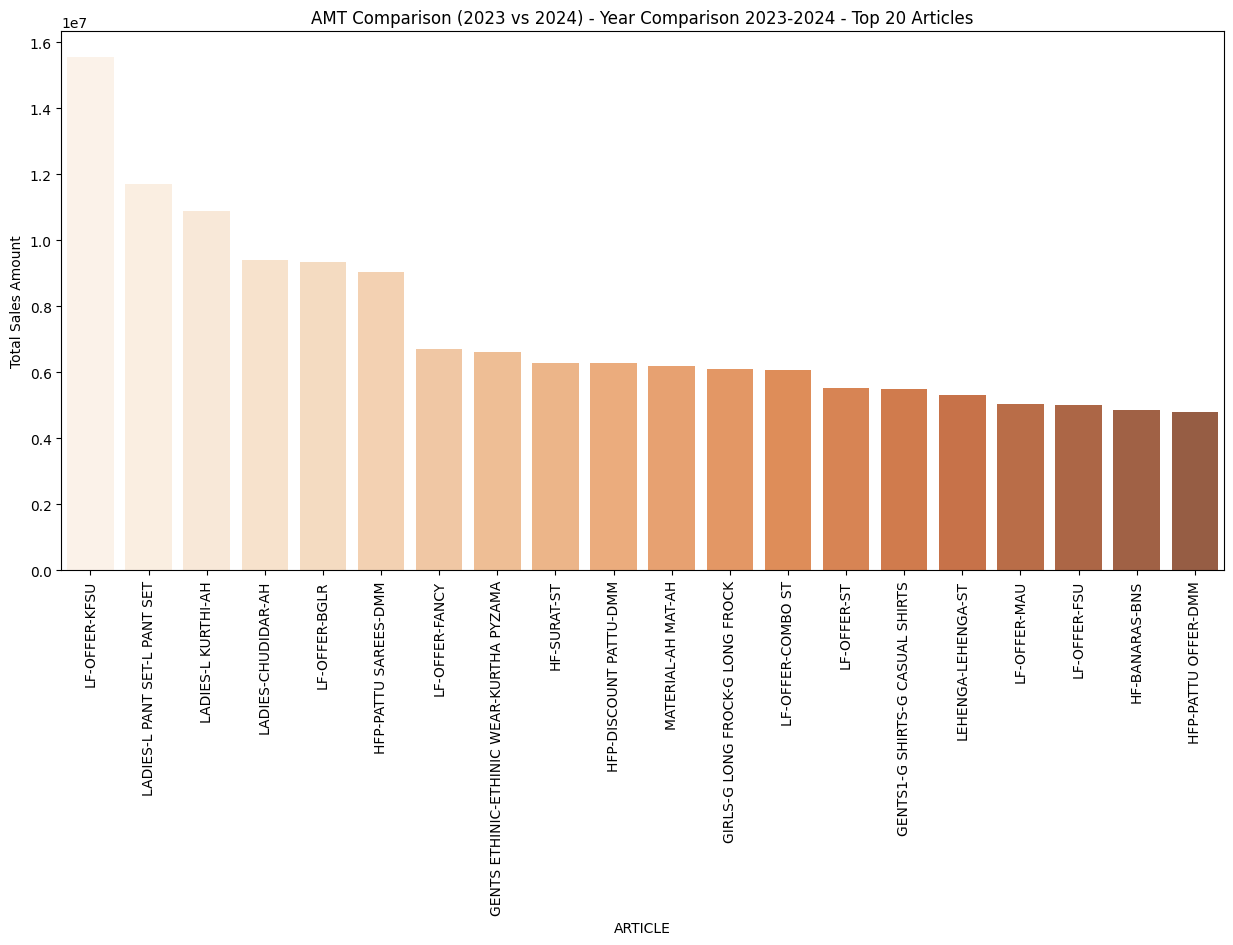

config.json:   0%|          | 0.00/930 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/59.6k [00:00<?, ?B/s]

model-00001-of-00030.safetensors:   0%|          | 0.00/4.58G [00:00<?, ?B/s]

model-00002-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00003-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00005-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00007-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00008-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00009-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00010-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

In [ ]:
# Perform comparative growth study and gather results
years = sorted(df['Year'].unique())  # Assuming 'df' is your dataset
comparative_results = comparative_growth_study_with_slider(df, years)

# Prepare the input for LLaMA
input_text = prepare_input_for_llama(comparative_results)

# Generate report from LLaMA
report = generate_report_with_llama(input_text)

# Display the generated report
print("\nGenerated Report:\n")
print(report)
